In [1]:
# import all the important stuff
import numpy as np 
import pandas as pd 
import seaborn as sb 
import re
%matplotlib inline
pd.options.display.max_columns=200

import requests 
import pprint

from datetime import datetime


In [2]:
# API data analysis
# https://developers.themoviedb.org/3/search/search-movies
MovieDatabaseQuery= requests.get("https://api.themoviedb.org/3/search/movie?api_key=bc5e1e9bea33d3e6ac0fc23807b7d62c&language=en-US&query=Avengers&page=1&include_adult=false").json()

In [3]:
MovieDatabaseQuery 
# this query finds all movies with the word "avengers" in the title

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg',
   'genre_ids': [12, 878, 28],
   'id': 299534,
   'original_language': 'en',
   'original_title': 'Avengers: Endgame',
   'overview': "After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store.",
   'popularity': 203.628,
   'poster_path': '/or06FN3Dka5tukK1e9sl16pB3iy.jpg',
   'release_date': '2019-04-24',
   'title': 'Avengers: Endgame',
   'video': False,
   'vote_average': 8.3,
   'vote_count': 15913},
  {'adult': False,
   'backdrop_path': '/lmZFxXgJE3vgrciwuDib0N8CfQo.jpg',
   'genre_ids': [12, 28, 878],
   'id': 299536,
   'original_language': 'en',
   'original_title': 'Avengers: Infinity War',
   'overview': 'As the

In [4]:
type(MovieDatabaseQuery)

dict

In [5]:
MovieDatabaseQuery["results"][1]["title"]

'Avengers: Infinity War'

In [6]:
# print the movie title and popularity score
for i in range (0, len(MovieDatabaseQuery["results"])):
    print(MovieDatabaseQuery["results"][i]["title"])
    print(MovieDatabaseQuery["results"][i]["popularity"])

Avengers: Endgame
203.628
Avengers: Infinity War
225.948
The Avengers
99.658
Avengers: Age of Ultron
77.308
Avengers Grimm
27.501
The Avengers
21.087
Ultimate Avengers 2
23.145
Ultimate Avengers: The Movie
22.903
Next Avengers: Heroes of Tomorrow
18.091
Bikini Avengers
9.547
Avengers Grimm: Time Wars
11.683
LEGO Marvel Super Heroes: Avengers Reassembled!
11.276
The Avengers: A Visual Journey
9.79
Building the Dream: Assembling the Avengers
10.483
Alien Avengers II
3.694
Alien Avengers
2.94
Avengers of Justice: Farce Wars
4.905
The Avengers
1.737
The Avengers: Earth's Mightiest Heroes - Prelude
3.481
Avengers
0.635


In [7]:
# I wonder how this website calculates it popularity rating 
# found it! it's described here 
# https://developers.themoviedb.org/3/getting-started/popularity
# so does the popularity scale change each day? 

# would it be possible for me to create a csv file or dataframe that collects the title of the movie and it's popularity rating? 
# I could also make this csv file include the information from the IMDB csv as well 

In [8]:
# create lists for the titles and popularity scores 
# create a dictionary to store the titles and scores to turn into dataframe
titleList=[]
popularityScoreList=[]
movieDatabaseDict={}
for i in range (0, len(MovieDatabaseQuery["results"])):
    titleList.append(MovieDatabaseQuery["results"][i]["title"])
    popularityScoreList.append(MovieDatabaseQuery["results"][i]["popularity"])
    movieDatabaseDict[MovieDatabaseQuery["results"][i]["title"]]=MovieDatabaseQuery["results"][i]["popularity"]

In [9]:
print(titleList)
print(popularityScoreList)

['Avengers: Endgame', 'Avengers: Infinity War', 'The Avengers', 'Avengers: Age of Ultron', 'Avengers Grimm', 'The Avengers', 'Ultimate Avengers 2', 'Ultimate Avengers: The Movie', 'Next Avengers: Heroes of Tomorrow', 'Bikini Avengers', 'Avengers Grimm: Time Wars', 'LEGO Marvel Super Heroes: Avengers Reassembled!', 'The Avengers: A Visual Journey', 'Building the Dream: Assembling the Avengers', 'Alien Avengers II', 'Alien Avengers', 'Avengers of Justice: Farce Wars', 'The Avengers', "The Avengers: Earth's Mightiest Heroes - Prelude", 'Avengers']
[203.628, 225.948, 99.658, 77.308, 27.501, 21.087, 23.145, 22.903, 18.091, 9.547, 11.683, 11.276, 9.79, 10.483, 3.694, 2.94, 4.905, 1.737, 3.481, 0.635]


In [10]:
movieDatabaseDict # can create a dictionary to turn into a dataframe 
# if the movie in the query is in the movie list of the 24 we are looking at, 
# add it to the dictionary 

{'Avengers: Endgame': 203.628,
 'Avengers: Infinity War': 225.948,
 'The Avengers': 1.737,
 'Avengers: Age of Ultron': 77.308,
 'Avengers Grimm': 27.501,
 'Ultimate Avengers 2': 23.145,
 'Ultimate Avengers: The Movie': 22.903,
 'Next Avengers: Heroes of Tomorrow': 18.091,
 'Bikini Avengers': 9.547,
 'Avengers Grimm: Time Wars': 11.683,
 'LEGO Marvel Super Heroes: Avengers Reassembled!': 11.276,
 'The Avengers: A Visual Journey': 9.79,
 'Building the Dream: Assembling the Avengers': 10.483,
 'Alien Avengers II': 3.694,
 'Alien Avengers': 2.94,
 'Avengers of Justice: Farce Wars': 4.905,
 "The Avengers: Earth's Mightiest Heroes - Prelude": 3.481,
 'Avengers': 0.635}

In [11]:
# let's run a query for movies with thor in the title
ThorMovieDatabaseQuery= requests.get("https://api.themoviedb.org/3/search/movie?api_key=bc5e1e9bea33d3e6ac0fc23807b7d62c&language=en-US&query=Thor&page=1&include_adult=false").json()

In [12]:
ThorMovieDatabaseQuery

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/kaIfm5ryEOwYg8mLbq8HkPuM1Fo.jpg',
   'genre_ids': [28, 12, 35, 14],
   'id': 284053,
   'original_language': 'en',
   'original_title': 'Thor: Ragnarok',
   'overview': 'Thor is imprisoned on the other side of the universe and finds himself in a race against time to get back to Asgard to stop Ragnarok, the destruction of his home-world and the end of Asgardian civilization, at the hands of an all-powerful new threat, the ruthless Hela.',
   'popularity': 89.57,
   'poster_path': '/rzRwTcFvttcN1ZpX2xv4j3tSdJu.jpg',
   'release_date': '2017-10-25',
   'title': 'Thor: Ragnarok',
   'video': False,
   'vote_average': 7.6,
   'vote_count': 14988},
  {'adult': False,
   'backdrop_path': '/3SDoquTjagne0jWzdxEu31KFLmw.jpg',
   'genre_ids': [12, 14, 28],
   'id': 10195,
   'original_language': 'en',
   'original_title': 'Thor',
   'overview': "Against his father Odin's will, The Mighty Thor - a powerful but arrogant warrior god - r

In [13]:
# let's get every film title and score again 
for i in range (0, len(ThorMovieDatabaseQuery["results"])):
    print(ThorMovieDatabaseQuery["results"][i]["title"])
    print(ThorMovieDatabaseQuery["results"][i]["popularity"])
    print( )

Thor: Ragnarok
89.57

Thor
42.649

Thor: The Dark World
43.101

Thor: Love and Thunder
15.203

Hulk vs. Thor
11.312

Team Thor
8.786

Almighty Thor
5.675

Team Thor: Part 2
6.804

Thor: Assembling the Troupe
7.931

Legends of Valhalla: Thor
3.313

I am Thor
4.571

Thor: Tales of Asgard
4.802

Thor the Conqueror
2.121

Adventures of Thunderstorm: Return of Thor
5.264

Thor: From Asgard to Earth
4.852

Thor: Hammer Time
2.563

Thor at the Bus Stop
2.793

A Viking Saga: Son of Thor
2.476

Berlin, Hallesches Thor
0.6

An-THOR-Logy 1976-1985
1.092



In [14]:
# I wonder how this website calculates it popularity rating 
# found it! it's described here 
# https://developers.themoviedb.org/3/getting-started/popularity
# so does the popularity scale change each day? 

# would it be possible for me to create a csv file or dataframe that collects the title of the movie and it's popularity rating? 
# I could also make this csv file include the information from the IMDB csv as well 


In [15]:
# if I take the popularity rating and title of movie from the API and place it in a new column in the 

In [16]:
# lets use IMDB data to extract the list of movie titles 
IMDBData=pd.read_csv("IMDB data marvel movies.csv")
IMDBData.drop([0], inplace = True) # delete GOTG vol 3 because it hasn't come out yet 
IMDBData["Title"]

TitlesList=[]
for i in range(1, len(IMDBData)):
    TitlesList.append(IMDBData["Title"].astype(str).apply(lambda x:x[0:-14])[i])

In [17]:
TitlesList # perfect! Now we have a list of titles to work with 

['Iron Man 2',
 'Guardians of the Galaxy',
 'Black Panther',
 'Iron Man 3',
 'The Incredible Hulk',
 'Captain Marvel',
 'Iron Man',
 'Thor',
 'Captain America: Civil War',
 'Spider-Man: Far from Home',
 'Avengers: Infinity War',
 'Spider-Man: Homecoming',
 'Captain America: The First Avenger',
 'Avengers: Endgame',
 'Ant-Man and the Wasp',
 'Ant-Man',
 'Thor: The Dark World',
 'Captain America: The Winter Soldier',
 'Avengers: Age of Ultron',
 'Guardians of the Galaxy Vol. 2',
 'Thor: Ragnarok',
 'Doctor Strange']

In [18]:
# create a dictionary to store the titles and popularity scores 
dictOfTitlesAndPopScore={}
# create a list to store the release dates
listOfReleaseDates=[]
# for every movie in the list of movies from IMDB
for title in TitlesList:
    # run a query 
    TitleDatabaseQuery= requests.get("https://api.themoviedb.org/3/search/movie?api_key=bc5e1e9bea33d3e6ac0fc23807b7d62c&language=en-US&query=" + title + "&page=1&include_adult=false").json()
    # for the length of that query's results 
    for i in range (0, len(TitleDatabaseQuery["results"])): 
        # if the title is in the list AND the score is greater than 40
        if TitleDatabaseQuery["results"][i]["title"]==title and TitleDatabaseQuery["results"][i]["popularity"]>40:
            # put the title and score in the dictionary
            dictOfTitlesAndPopScore[TitleDatabaseQuery["results"][i]["title"]]=TitleDatabaseQuery["results"][i]["popularity"]
            # add the release date to the list 
            listOfReleaseDates.append(TitleDatabaseQuery["results"][i]["release_date"])

            print(TitleDatabaseQuery["results"][i]["title"])
            print(TitleDatabaseQuery["results"][i]["popularity"])
            print(TitleDatabaseQuery["results"][i]["release_date"])
            print( )
            
            # now why do I have multiples?
            # now if the title's popularity score is under 40 leave 
            # it out of the list because that's not the right version of the movie
        

Iron Man 2
51.905
2010-04-28

Black Panther
104.974
2018-02-13

Iron Man 3
70.948
2013-04-18

Captain Marvel
121.102
2019-03-06

Iron Man
69.599
2008-04-30

Thor
42.649
2011-04-21

Captain America: Civil War
71.213
2016-04-27

Spider-Man: Far from Home
163.554
2019-06-28

Avengers: Infinity War
225.948
2018-04-25

Spider-Man: Homecoming
111.413
2017-07-05

Avengers: Endgame
203.628
2019-04-24

Ant-Man and the Wasp
59.435
2018-07-04

Ant-Man
43.119
2015-07-14

Thor: The Dark World
43.101
2013-10-29

Avengers: Age of Ultron
77.308
2015-04-22

Guardians of the Galaxy Vol. 2
64.11
2017-04-19

Thor: Ragnarok
89.57
2017-10-25

Doctor Strange
61.864
2016-10-25



In [19]:
dictOfTitlesAndPopScore 
# now we have a dictionary of all of the movies and their respective popularity scores 
# now I turn this dictionary into a dataframe and add the release dates as an additional column 

{'Iron Man 2': 51.905,
 'Black Panther': 104.974,
 'Iron Man 3': 70.948,
 'Captain Marvel': 121.102,
 'Iron Man': 69.599,
 'Thor': 42.649,
 'Captain America: Civil War': 71.213,
 'Spider-Man: Far from Home': 163.554,
 'Avengers: Infinity War': 225.948,
 'Spider-Man: Homecoming': 111.413,
 'Avengers: Endgame': 203.628,
 'Ant-Man and the Wasp': 59.435,
 'Ant-Man': 43.119,
 'Thor: The Dark World': 43.101,
 'Avengers: Age of Ultron': 77.308,
 'Guardians of the Galaxy Vol. 2': 64.11,
 'Thor: Ragnarok': 89.57,
 'Doctor Strange': 61.864}

In [20]:
listOfReleaseDates

['2010-04-28',
 '2018-02-13',
 '2013-04-18',
 '2019-03-06',
 '2008-04-30',
 '2011-04-21',
 '2016-04-27',
 '2019-06-28',
 '2018-04-25',
 '2017-07-05',
 '2019-04-24',
 '2018-07-04',
 '2015-07-14',
 '2013-10-29',
 '2015-04-22',
 '2017-04-19',
 '2017-10-25',
 '2016-10-25']

In [21]:
# create the dataframe
popularityDF = pd.DataFrame(list(dictOfTitlesAndPopScore.items()),columns = ['Title','Popularity Score']) 

In [22]:
popularityDF # Now we have a dataframe with the title and popularity score to sort! 

,Title,Popularity Score
0,Iron Man 2,51.905
1,Black Panther,104.974
2,Iron Man 3,70.948
3,Captain Marvel,121.102
4,Iron Man,69.599
5,Thor,42.649
6,Captain America: Civil War,71.213
7,Spider-Man: Far from Home,163.554
8,Avengers: Infinity War,225.948
9,Spider-Man: Homecoming,111.413


In [23]:
# sort the df by popularity score
popularityDF.sort_values("Popularity Score", ascending=False)
# avengers: age of ultron is a lot less popular on this list than it is in the IMDB dataframe

,Title,Popularity Score
8,Avengers: Infinity War,225.948
10,Avengers: Endgame,203.628
7,Spider-Man: Far from Home,163.554
3,Captain Marvel,121.102
9,Spider-Man: Homecoming,111.413
1,Black Panther,104.974
16,Thor: Ragnarok,89.570
14,Avengers: Age of Ultron,77.308
6,Captain America: Civil War,71.213
2,Iron Man 3,70.948


In [24]:
# I need to add a year column to the dataframe in order to track popularities by year
popularityDF.insert(2, "Release Date", listOfReleaseDates, True) 

In [25]:
popularityDF

,Title,Popularity Score,Release Date
0,Iron Man 2,51.905,2010-04-28
1,Black Panther,104.974,2018-02-13
2,Iron Man 3,70.948,2013-04-18
3,Captain Marvel,121.102,2019-03-06
4,Iron Man,69.599,2008-04-30
5,Thor,42.649,2011-04-21
6,Captain America: Civil War,71.213,2016-04-27
7,Spider-Man: Far from Home,163.554,2019-06-28
8,Avengers: Infinity War,225.948,2018-04-25
9,Spider-Man: Homecoming,111.413,2017-07-05


In [26]:
# but the release date is a string when it needs to be a datetime object
type(popularityDF["Release Date"][1])

str

In [39]:
# let's turn them into datetime objects 
for i in range (0, len(popularityDF)):
    print(datetime.strptime(popularityDF["Release Date"].astype(str).apply(lambda x:x[0:])[i], '%Y-%m-%d'))
    popularityDF["Release Date"][i]=datetime.strptime(popularityDF["Release Date"].astype(str).apply(lambda x:x[0:])[i], '%Y-%m-%d')

2010-04-28 00:00:00
2018-02-13 00:00:00
2013-04-18 00:00:00
2019-03-06 00:00:00
2008-04-30 00:00:00
2011-04-21 00:00:00
2016-04-27 00:00:00
2019-06-28 00:00:00
2018-04-25 00:00:00
2017-07-05 00:00:00
2019-04-24 00:00:00
2018-07-04 00:00:00
2015-07-14 00:00:00
2013-10-29 00:00:00
2015-04-22 00:00:00
2017-04-19 00:00:00
2017-10-25 00:00:00
2016-10-25 00:00:00


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [40]:
popularityDF
# now the dates are right

,Title,Popularity Score,Release Date
0,Iron Man 2,51.905,2010-04-28 00:00:00
1,Black Panther,104.974,2018-02-13 00:00:00
2,Iron Man 3,70.948,2013-04-18 00:00:00
3,Captain Marvel,121.102,2019-03-06 00:00:00
4,Iron Man,69.599,2008-04-30 00:00:00
5,Thor,42.649,2011-04-21 00:00:00
6,Captain America: Civil War,71.213,2016-04-27 00:00:00
7,Spider-Man: Far from Home,163.554,2019-06-28 00:00:00
8,Avengers: Infinity War,225.948,2018-04-25 00:00:00
9,Spider-Man: Homecoming,111.413,2017-07-05 00:00:00


In [41]:
# sorted by release date 
popularityDF.sort_values("Release Date", ascending= False)

,Title,Popularity Score,Release Date
7,Spider-Man: Far from Home,163.554,2019-06-28 00:00:00
10,Avengers: Endgame,203.628,2019-04-24 00:00:00
3,Captain Marvel,121.102,2019-03-06 00:00:00
11,Ant-Man and the Wasp,59.435,2018-07-04 00:00:00
8,Avengers: Infinity War,225.948,2018-04-25 00:00:00
1,Black Panther,104.974,2018-02-13 00:00:00
16,Thor: Ragnarok,89.570,2017-10-25 00:00:00
9,Spider-Man: Homecoming,111.413,2017-07-05 00:00:00
15,Guardians of the Galaxy Vol. 2,64.110,2017-04-19 00:00:00
17,Doctor Strange,61.864,2016-10-25 00:00:00


In [42]:
# Group by the year of release and aggregate on the popularity score to get the average 
# pop score of movies for each year 
GroupByYearNew=popularityDF.groupby(popularityDF["Release Date"].dt.year).agg({"Popularity Score":np.mean}).sort_values("Popularity Score",ascending=False)
GroupByYearNew=GroupByYearNew.reset_index()

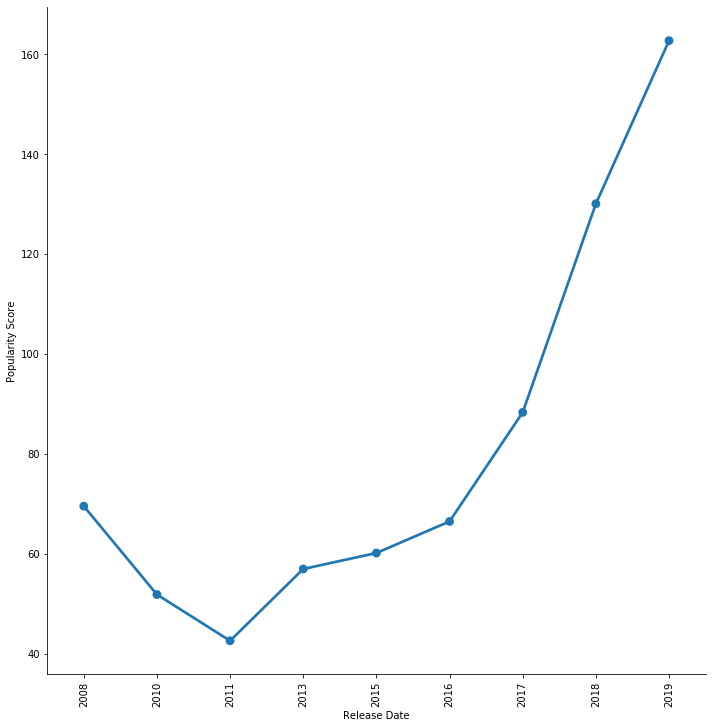

In [43]:
# this graph shows the average popularity score per year of marvel movies
# you can still see that big dip in 2011 as in the IMDB data 
# the imdb data showed a dip in 2018, this one does not 
# why? 
AvgPopScorePlot=sb.catplot(x="Release Date",y="Popularity Score", data=GroupByYearNew,height=10,kind="point").set_xticklabels(rotation=90)
AvgPopScorePlot
AvgPopScorePlot.savefig("AvgPopScorePlot.png")

In [44]:
# what movies came out in 2018? 
popularityDF.loc[popularityDF["Release Date"].dt.year==2018]

# so in 2018 Ant-Man and the Wasp came out which TANKED, so that most likely brought the pop score average down 
# but then infinity war came out with boosted it WAYYYY up 

,Title,Popularity Score,Release Date
1,Black Panther,104.974,2018-02-13 00:00:00
8,Avengers: Infinity War,225.948,2018-04-25 00:00:00
11,Ant-Man and the Wasp,59.435,2018-07-04 00:00:00
